# Homework # 4 Naive BAYES Classifier

### Instructor - Dr. Uma Gajendragadkar

### Problem - Design and develop Machine learning model to predict Diabetes using Naive Bayes Algorithm. 

### Dataset - Diabetes dataset

This dataset consists of 768 observations & 8 numerical independent variables.
Dependent and target variable is OUTCOME. 1 means diabetes test result being positive, 0 means indicates negative.

Pregnancies: Number of Times Being Pregnant

Glucose: Plasma Glucose Concentration (a 2 hours in an oral glucose tolerance test)

BloodPressure: Diastolic Blood Pressure (mm Hg)

SkinThickness: Triceps Skin Fold Thickness (mm)

Insulin: 2-Hour Serum Insulin (mu U/ml)

BMI: Body Mass Index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes Pedigree Function

Age: Age

Outcome: Class variable ( 0 - 1)



In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot  as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

Step 1 - Write code to Read data from dataset into pandas dataframe

In [4]:
# Step 1 - Load dataset into pandas DataFrame

# Replace "data.csv" with your actual file name
diabetes = pd.read_csv("diabetes.csv")


Step 2 - a) Write code to display dataset info 
b) Print 10 rows from dataset.

In [5]:
# Display first 10 rows to confirm it's loaded correctly
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


In [6]:
# Step 3 - Remove Pregnancy column

diabetes = diabetes.drop(columns=['Pregnancies'])

# Display columns to confirm Pregnancy column removed
diabetes.head()


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.600,0.627,50,1
1,85,66,29,0,26.600,0.351,31,0
2,183,64,0,0,23.300,0.672,32,1
3,89,66,23,94,28.100,0.167,21,0
4,137,40,35,168,43.100,2.288,33,1


Step 3 - Write code to remove Pregnancy column 

Step 4 - Write code to display info of dataset and check shape of dataset.

In [9]:
# Step 4 - Display updated dataset info and shape

print("Updated Dataset Information:")
diabetes.info()

print("\nShape of the Dataset:")
diabetes.shape

Updated Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB

Shape of the Dataset:


(768, 8)

Step 5 - Write code to clean data

In [7]:
# Clean data

# Ｃlean up column names (replace spaces with underscore)
diabetes.columns = [c.strip().replace(' ', '_') for c in diabetes.columns]

# Replace zeros with NaN for specific physiologic fields 
zero_as_missing = [col for col in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] if col in diabetes.columns]
for col in zero_as_missing:
    diabetes[col] = diabetes[col].replace(0, np.nan)

# List of columns where zero values are not valid and should be replaced
cols_with_zero_invalid = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

# Replace 0 with median of each column
for col in cols_with_zero_invalid:
    diabetes[col] = diabetes[col].replace(0, diabetes[col].median())
    
# Impute missing values with median 
for col in diabetes.columns:
    if diabetes[col].dtype.kind in "biufc":  # numeric
        diabetes[col] = diabetes[col].fillna(diabetes[col].median())

# Remove duplicate rows if any
before = diabetes.shape[0]
diabetes = diabetes.drop_duplicates()
after = diabetes.shape[0]
print(f"Removed {before - after} duplicate rows")

# Final quick check
diabetes.info()
print("Shape after cleaning:", diabetes.shape)
diabetes.head()

Removed 0 duplicate rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    float64
 1   BloodPressure             768 non-null    float64
 2   SkinThickness             768 non-null    float64
 3   Insulin                   768 non-null    float64
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.1 KB
Shape after cleaning: (768, 8)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.000,72.000,35.000,125.000,33.600,0.627,50,1
1,85.000,66.000,29.000,125.000,26.600,0.351,31,0
2,183.000,64.000,29.000,125.000,23.300,0.672,32,1
3,89.000,66.000,23.000,94.000,28.100,0.167,21,0
4,137.000,40.000,35.000,168.000,43.100,2.288,33,1


Step 6 - Split data into training and testing sets ( 80: 20 ratio)

In [8]:
#Split data into Training and Testing Sets (80:20)

# Separate features (X) and target variable (y)
X = diabetes.drop('Outcome', axis=1)   # Replace 'Outcome' if your target column has a different name
y = diabetes['Outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Display shapes to confirm split
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (614, 7)
Testing set shape: (154, 7)


#### **Step #7: Initialize your model**




In [14]:
# Initialize Naive Bayes Classifier Model

model = GaussianNB()



#### **Step #8: Fit your model, test on the testing data, and create a visualization if applicable**

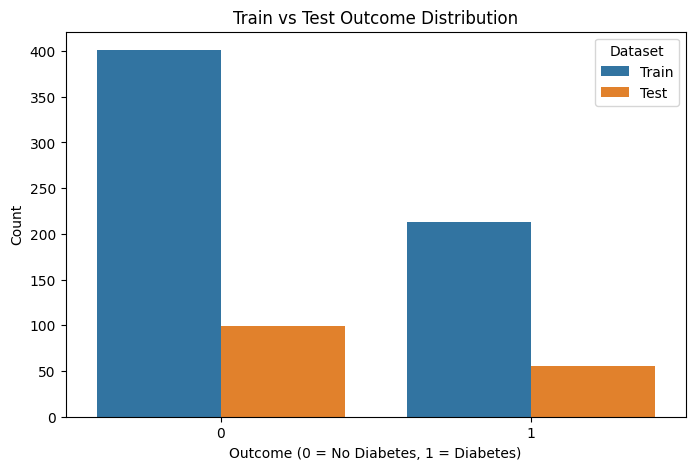

In [18]:
# Fit the model using the training data
model.fit(X_train, y_train)

# Visualization of Train and Test Data Distribution

# Add a column to indicate dataset split
train_plot = y_train.copy().to_frame()
train_plot['Dataset'] = 'Train'

test_plot = y_test.copy().to_frame()
test_plot['Dataset'] = 'Test'

combined = pd.concat([train_plot, test_plot])

plt.figure(figsize=(8,5))
sns.countplot(data=combined, x='Outcome', hue='Dataset')
plt.title("Train vs Test Outcome Distribution")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()

Step 9 - Predict using model on test data

In [16]:
# Predict on the testing data
y_pred = model.predict(X_test)

Step 10 -  Find accuracy of model

In [12]:
# Find accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.7597402597402597

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



Step 11 - Confusion Matrix

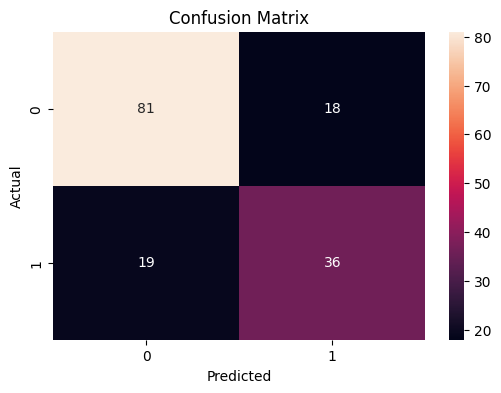

In [17]:
# Create Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()